In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [4]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

In [7]:
X_train[:1]

array([[[ 0.4596948 ],
        [ 0.31486678],
        [ 0.12497123],
        [-0.1039134 ],
        [-0.33817387],
        [-0.53167135],
        [-0.65472883],
        [-0.6680997 ],
        [-0.6068115 ],
        [-0.50168324],
        [-0.27951923],
        [-0.15070675],
        [ 0.01001816],
        [ 0.11860766],
        [ 0.09566415],
        [ 0.1479297 ],
        [ 0.16850619],
        [ 0.19524719],
        [ 0.22094081],
        [ 0.38448656],
        [ 0.4021102 ],
        [ 0.5566975 ],
        [ 0.55000687],
        [ 0.47437248],
        [ 0.29733396],
        [ 0.13306592],
        [-0.1292547 ],
        [-0.36367297],
        [-0.49515054],
        [-0.65279794],
        [-0.6665792 ],
        [-0.5604573 ],
        [-0.50344354],
        [-0.28775147],
        [-0.12684062],
        [-0.0095053 ],
        [ 0.12024356],
        [ 0.18013756],
        [ 0.1559989 ],
        [ 0.1756968 ],
        [ 0.217454  ],
        [ 0.30272725],
        [ 0.38143268],
        [ 0

<IPython.core.display.Javascript object>


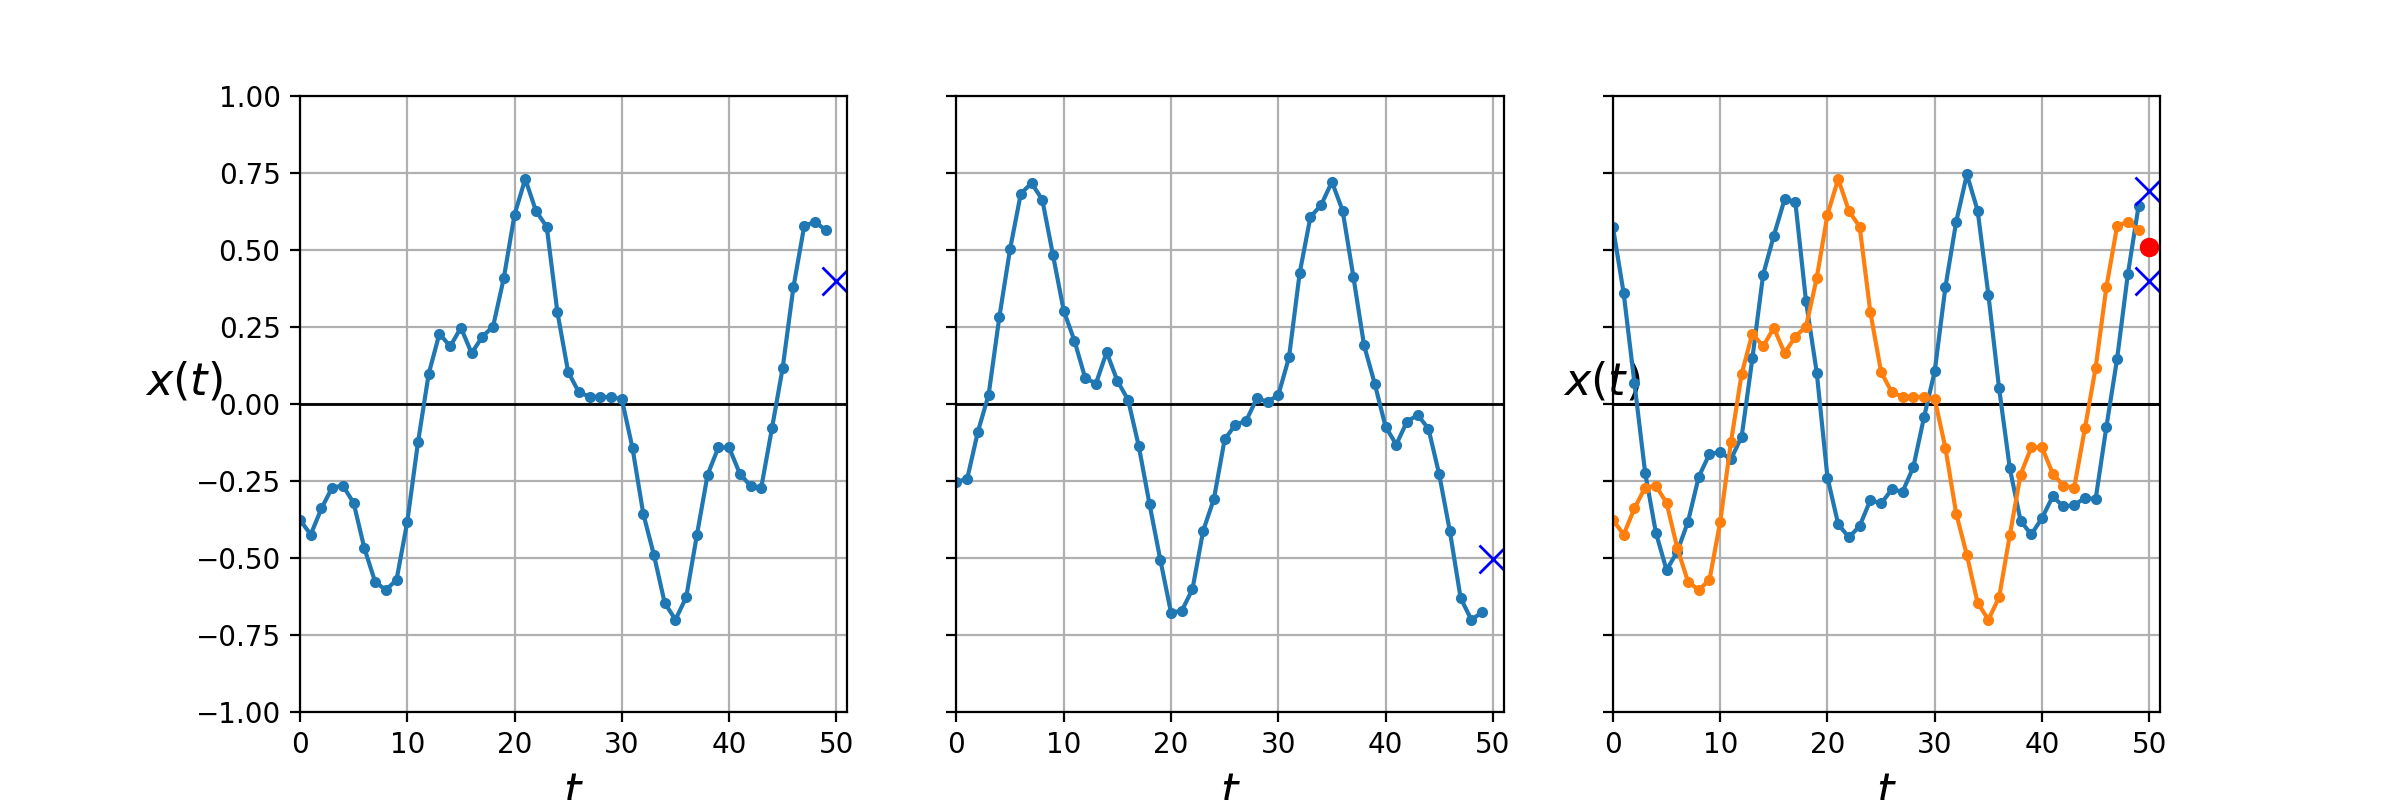

In [8]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
plt.show()

In [10]:
# Define the structure of the RNN model
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

In [12]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['mse'])

In [13]:
history = model.fit(X_train, y_train,
                   epochs=20,
                   validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 2s 287us/sample - loss: 0.2036 - mse: 0.2036 - val_loss: 0.1333 - val_mse: 0.1333
Epoch 2/20
7000/7000 [==============================] - 2s 215us/sample - loss: 0.1008 - mse: 0.1008 - val_loss: 0.0871 - val_mse: 0.0871
Epoch 3/20
7000/7000 [==============================] - 2s 215us/sample - loss: 0.0754 - mse: 0.0754 - val_loss: 0.0700 - val_mse: 0.0700
Epoch 4/20
7000/7000 [==============================] - 2s 220us/sample - loss: 0.0617 - mse: 0.0617 - val_loss: 0.0581 - val_mse: 0.0581
Epoch 5/20
7000/7000 [==============================] - 2s 215us/sample - loss: 0.0520 - mse: 0.0520 - val_loss: 0.0493 - val_mse: 0.0493
Epoch 6/20
7000/7000 [==============================] - 2s 215us/sample - loss: 0.0449 - mse: 0.0449 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 7/20
7000/7000 [==============================] - 1s 205us/sample - loss: 0.0394 - mse: 0.0394 - val_loss: 0.0376 - va

In [14]:
model.evaluate(X_test, y_test)

1000/1000 [==============================] - 0s 52us/sample - loss: 0.0149 - mse: 0.0149


[0.014931091517210006, 0.014931087]

<IPython.core.display.Javascript object>


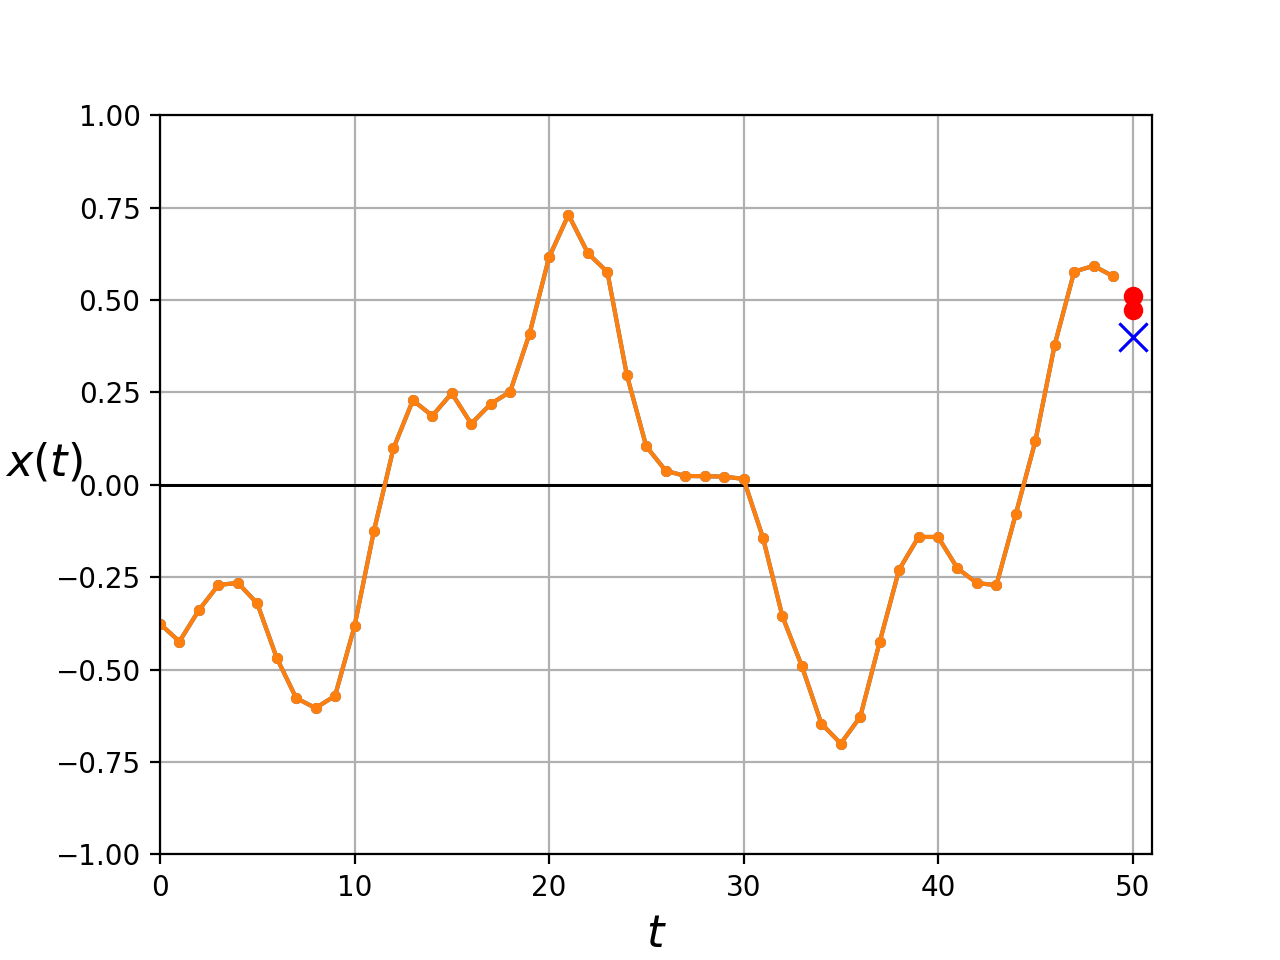

In [16]:
y_pred = model.predict(X_valid)
plt.figure(2)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

## Deep RNN

In [17]:
np.random.seed(SEED)
tf.random.set_seed(SEED)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss='mse',
             optimizer='adam')

history = model.fit(X_train, y_train,
                   epochs=20,
                   validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 6s 878us/sample - loss: 0.0433 - val_loss: 0.0073
Epoch 2/20
7000/7000 [==============================] - 5s 725us/sample - loss: 0.0066 - val_loss: 0.0052
Epoch 3/20
7000/7000 [==============================] - 5s 726us/sample - loss: 0.0051 - val_loss: 0.0043
Epoch 4/20
7000/7000 [==============================] - 5s 730us/sample - loss: 0.0045 - val_loss: 0.0044
Epoch 5/20
7000/7000 [==============================] - 5s 729us/sample - loss: 0.0040 - val_loss: 0.0038
Epoch 6/20
7000/7000 [==============================] - 5s 726us/sample - loss: 0.0038 - val_loss: 0.0042
Epoch 7/20
7000/7000 [==============================] - 5s 731us/sample - loss: 0.0037 - val_loss: 0.0033
Epoch 8/20
7000/7000 [==============================] - 5s 739us/sample - loss: 0.0036 - val_loss: 0.0035
Epoch 9/20
7000/7000 [==============================] - 5s 731us/sample - loss: 0.0034 - val_loss: 0.003

In [18]:
model.evaluate(X_valid, y_valid)

2000/2000 [==============================] - 0s 183us/sample - loss: 0.0029


0.00293410531245172

<IPython.core.display.Javascript object>


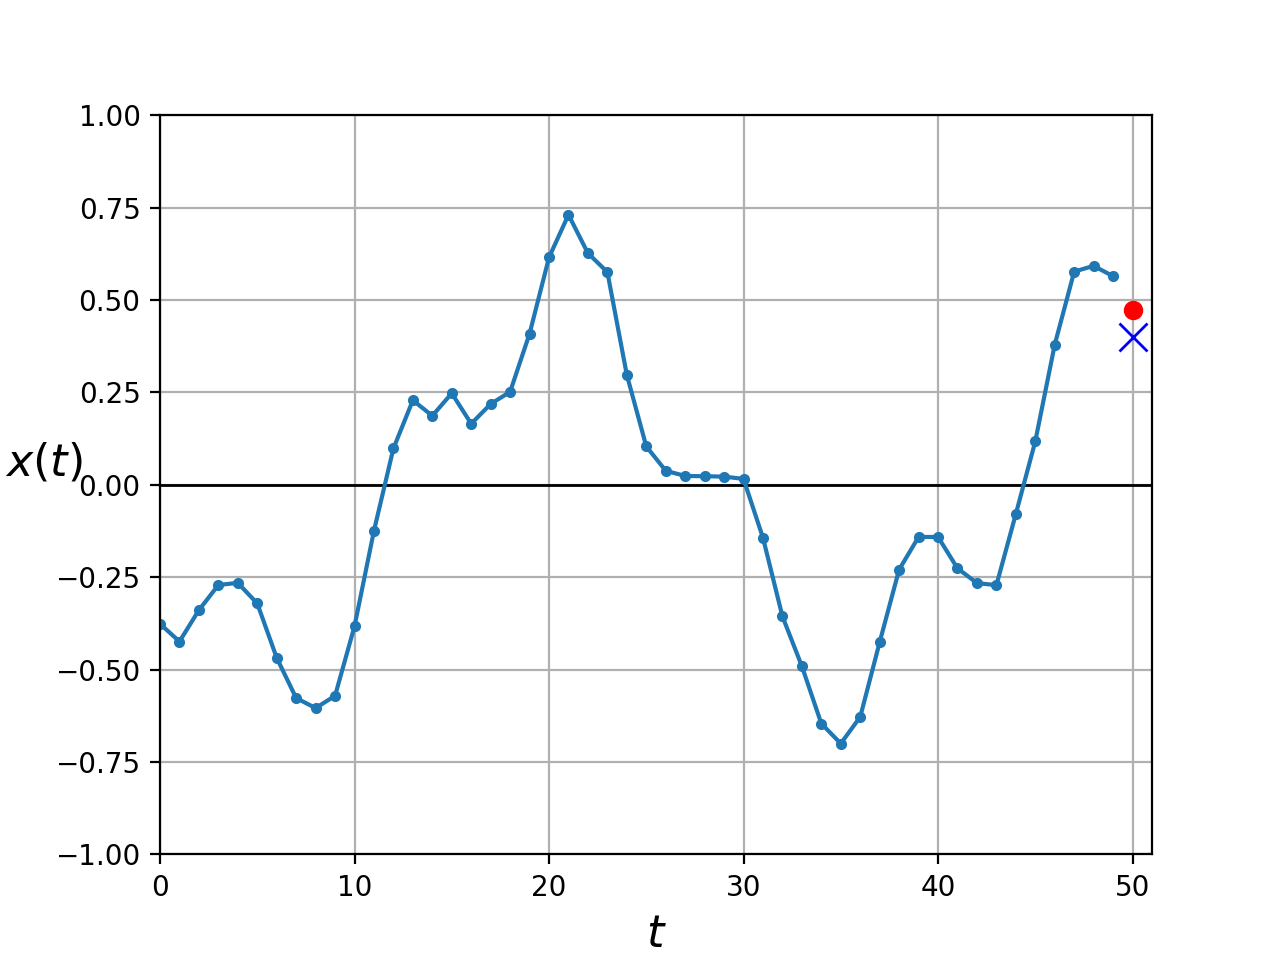

In [20]:
y_pred = model.predict(X_valid)
plt.figure(3)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

### Replacing RNN with dense layer as the output layer

In [21]:
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 5s 649us/sample - loss: 0.0221 - val_loss: 0.0053
Epoch 2/20
7000/7000 [==============================] - 4s 534us/sample - loss: 0.0043 - val_loss: 0.0037
Epoch 3/20
7000/7000 [==============================] - 4s 532us/sample - loss: 0.0035 - val_loss: 0.0032
Epoch 4/20
7000/7000 [==============================] - 4s 528us/sample - loss: 0.0033 - val_loss: 0.0032
Epoch 5/20
7000/7000 [==============================] - 4s 521us/sample - loss: 0.0032 - val_loss: 0.0030
Epoch 6/20
7000/7000 [==============================] - 4s 518us/sample - loss: 0.0031 - val_loss: 0.0030
Epoch 7/20
7000/7000 [==============================] - 4s 518us/sample - loss: 0.0031 - val_loss: 0.0028
Epoch 8/20
7000/7000 [==============================] - 4s 522us/sample - loss: 0.0031 - val_loss: 0.0028
Epoch 9/20
7000/7000 [==============================] - 4s 518us/sample - loss: 0.0030 - val_loss: 0.002

In [22]:
model.evaluate(X_valid, y_valid)

2000/2000 [==============================] - 0s 140us/sample - loss: 0.0026


0.0025768046267330646

<IPython.core.display.Javascript object>


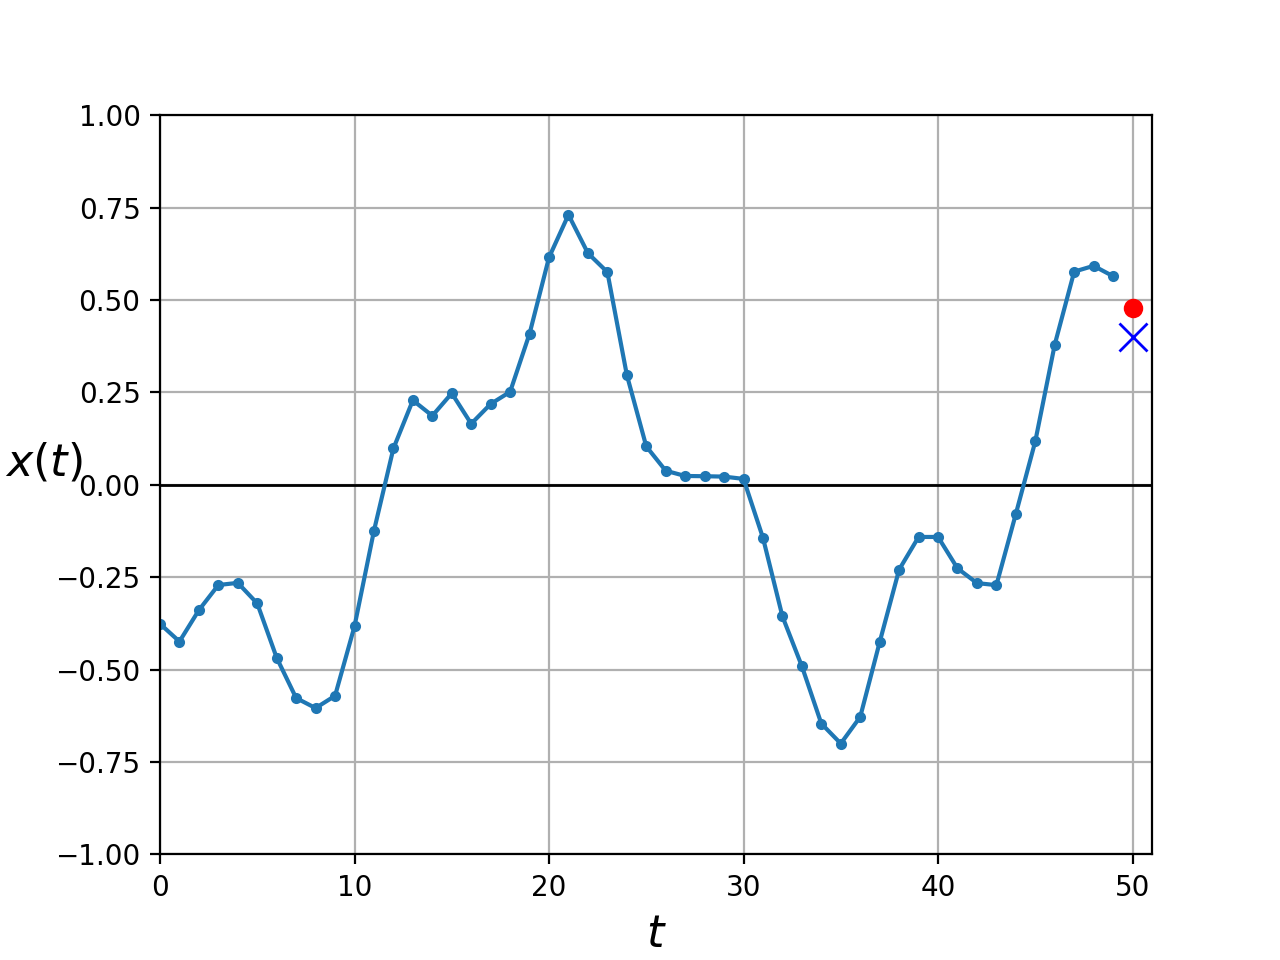

In [23]:
y_pred = model.predict(X_valid)
plt.figure(4)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

## Forecasting

The below RNN model makes a prediction using the last 50 values. Whenever a new preidction is made it is added to the X array. The issue with this is, the error keeps getting accummulated. The more we forecast in to the future the worse the predictions will get.

In [24]:
np.random.seed(43) # not 42, as it would give the first series in the train set

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

<IPython.core.display.Javascript object>


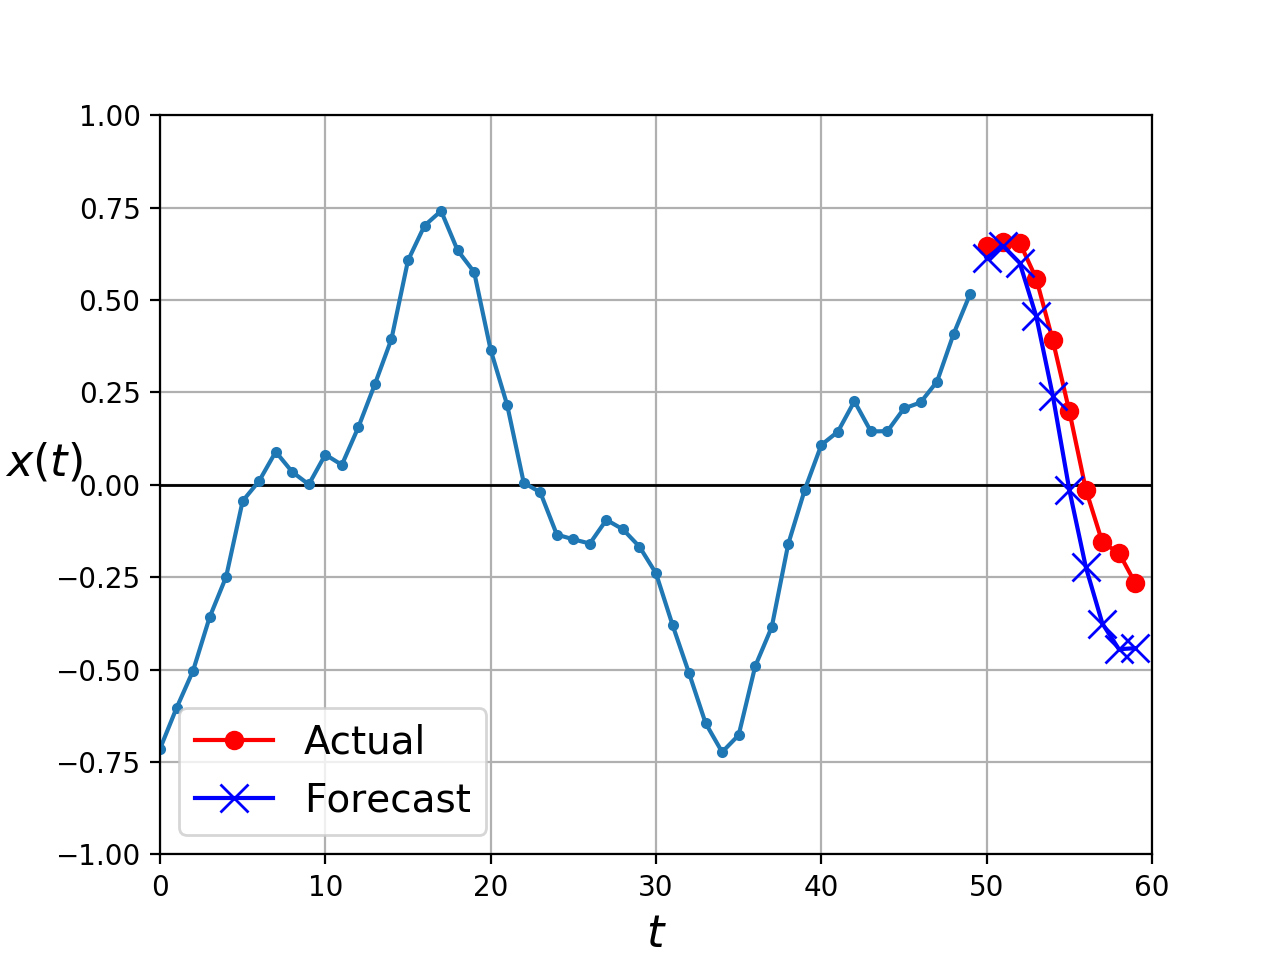

In [45]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plt.figure(5)
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

Instead of predicting only one value at a time, we can create an RNN model that can make all the 10 predictions at once. Let's see how to do that.

In [50]:
# Generate some time series
np.random.seed(SEED)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [52]:
X_train.shape

(7000, 50, 1)

In [58]:
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Define the structure of the model
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model.compile(loss="mse",
             optimizer="adam")

history = model.fit(X_train, Y_train,
                   epochs=20,
                   validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 4s 637us/sample - loss: 0.0665 - val_loss: 0.0317
Epoch 2/20
7000/7000 [==============================] - 4s 510us/sample - loss: 0.0268 - val_loss: 0.0221
Epoch 3/20
7000/7000 [==============================] - 4s 525us/sample - loss: 0.0188 - val_loss: 0.0166
Epoch 4/20
7000/7000 [==============================] - 4s 515us/sample - loss: 0.0159 - val_loss: 0.0137
Epoch 5/20
7000/7000 [==============================] - 4s 522us/sample - loss: 0.0138 - val_loss: 0.0127
Epoch 6/20
7000/7000 [==============================] - 4s 541us/sample - loss: 0.0132 - val_loss: 0.0117
Epoch 7/20
7000/7000 [==============================] - 4s 529us/sample - loss: 0.0119 - val_loss: 0.0117
Epoch 8/20
7000/7000 [==============================] - 4s 524us/sample - loss: 0.0115 - val_loss: 0.0119
Epoch 9/20
7000/7000 [==============================] - 4s 515us/sample - loss: 0.0110 - val_loss: 0.011

In [59]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

In [61]:
X_new.shape, Y_pred.shape, Y_new.shape

((1, 50, 1), (1, 10, 1), (1, 10, 1))

<IPython.core.display.Javascript object>


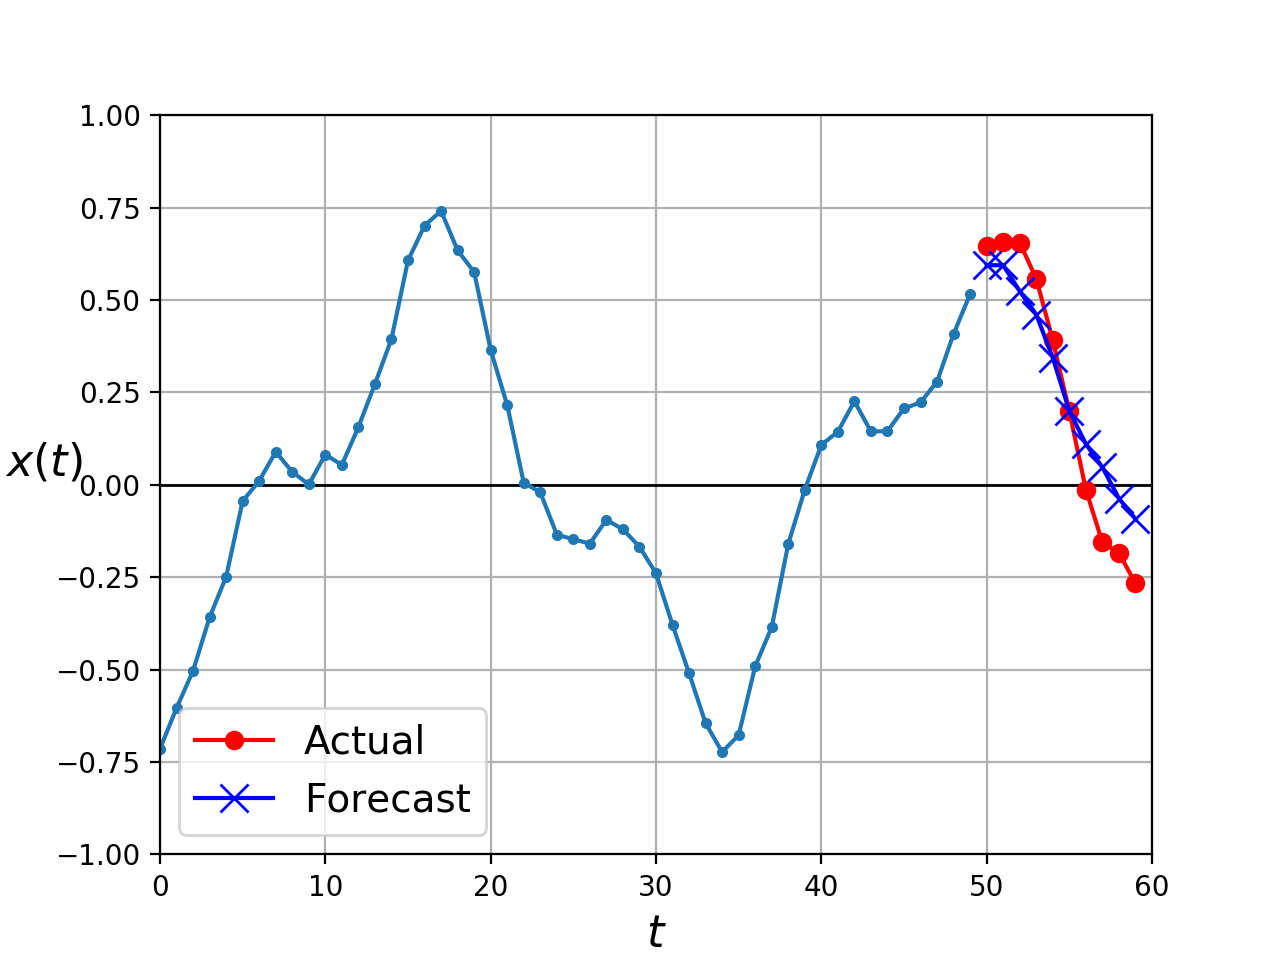

In [60]:
plt.figure(6)
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

Create an RNN model that will forecast from t to t+10 steps ahead given data from 0 to t.

In [62]:
np.random.seed(SEED)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [63]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [74]:
X_train[0, :11]

array([[ 0.4596948 ],
       [ 0.33874455],
       [ 0.18980233],
       [ 0.00611999],
       [-0.19590542],
       [-0.38614848],
       [-0.5440984 ],
       [-0.62904716],
       [-0.6633958 ],
       [-0.65724516],
       [-0.51447874]], dtype=float32)

In [79]:
Y_train[0, 0]

array([ 0.33874455,  0.18980233,  0.00611999, -0.19590542, -0.38614848,
       -0.54409838, -0.62904716, -0.66339582, -0.65724516, -0.51447874])

In [81]:
np.random.seed(SEED)
tf.random.set_seed(SEED)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse",
             optimizer="adam",
             metrics=[last_time_step_mse])

history = model.fit(X_train, Y_train,
                   epochs=20,
                   validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 4s 635us/sample - loss: 0.0742 - last_time_step_mse: 0.0645 - val_loss: 0.0469 - val_last_time_step_mse: 0.0350
Epoch 2/20
7000/7000 [==============================] - 4s 505us/sample - loss: 0.0439 - last_time_step_mse: 0.0312 - val_loss: 0.0406 - val_last_time_step_mse: 0.0267
Epoch 3/20
7000/7000 [==============================] - 3s 498us/sample - loss: 0.0395 - last_time_step_mse: 0.0254 - val_loss: 0.0397 - val_last_time_step_mse: 0.0301
Epoch 4/20
7000/7000 [==============================] - 3s 497us/sample - loss: 0.0373 - last_time_step_mse: 0.0226 - val_loss: 0.0364 - val_last_time_step_mse: 0.0235
Epoch 5/20
7000/7000 [==============================] - 4s 517us/sample - loss: 0.0356 - last_time_step_mse: 0.0207 - val_loss: 0.0341 - val_last_time_step_mse: 0.0190
Epoch 6/20
7000/7000 [==============================] - 4s 504us/sample - loss: 0.0346 - last_time_step_mse: 0.0

In [82]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

<IPython.core.display.Javascript object>


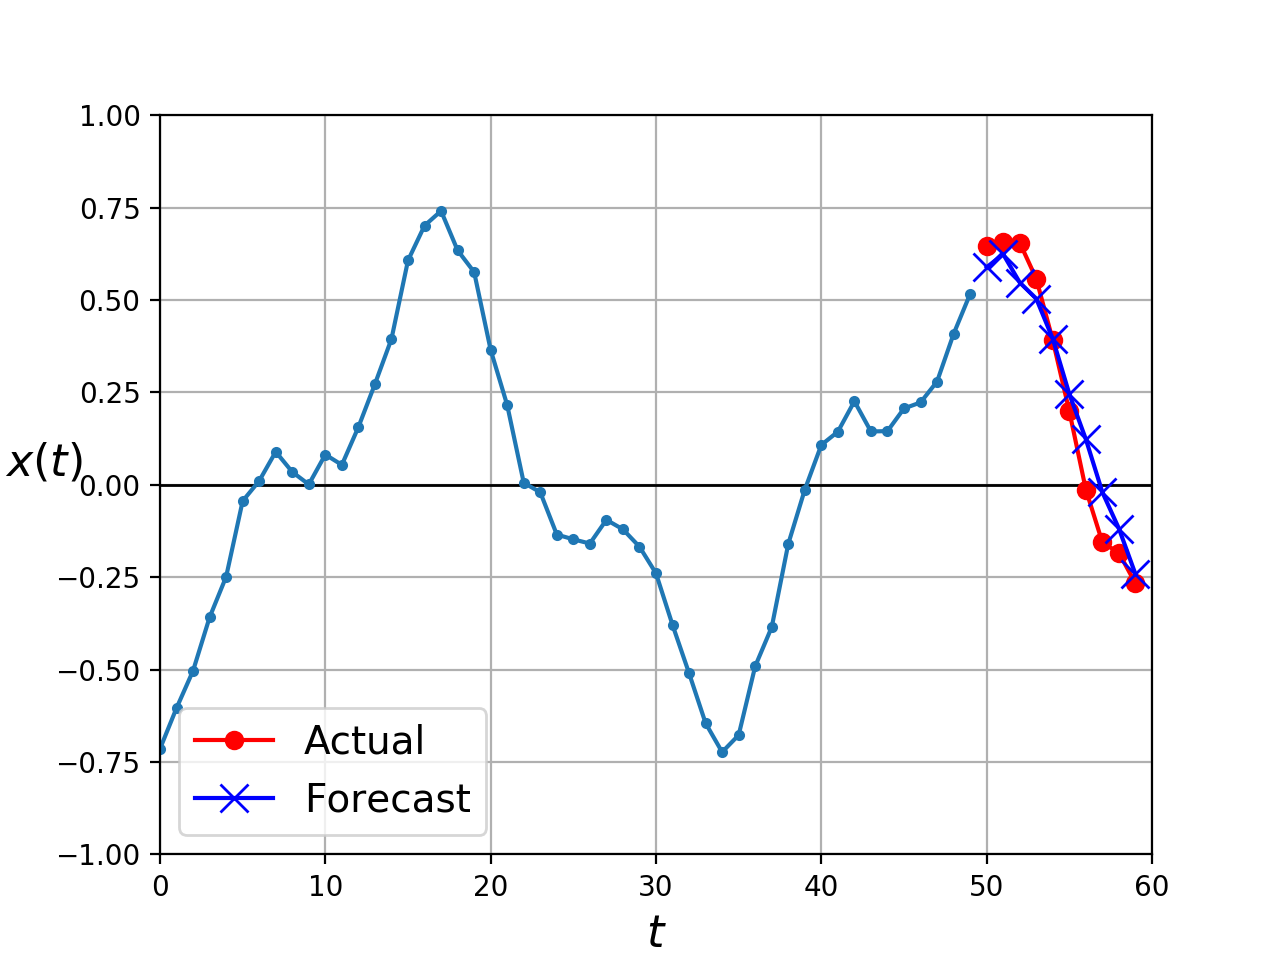

In [83]:
plt.figure(7)
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

## Using Convolutional layers with RNN

In [84]:
np.random.seed(SEED)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [85]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

1D conv layer with kernel size 4, stride 2, VALID padding:

                  |-----2-----|     |-----5---...------|     |-----23----|
            |-----1-----|     |-----4-----|   ...      |-----22----|
      |-----0----|      |-----3-----|     |---...|-----21----|
    X: 0  1  2  3  4  5  6  7  8  9  10 11 12 ... 42 43 44 45 46 47 48 49
    Y: 1  2  3  4  5  6  7  8  9  10 11 12 13 ... 43 44 45 46 47 48 49 50
      /10 11 12 13 14 15 16 17 18 19 20 21 22 ... 52 53 54 55 56 57 58 59

Output:

    X:     0/3   2/5   4/7   6/9   8/11 10/13 .../43 42/45 44/47 46/49
    Y:     4/13  6/15  8/17 10/19 12/21 14/23 .../53 46/55 48/57 50/59

In [91]:
Y_train[1, 5]

array([[-0.54409838, -0.62904716, -0.66339582, ..., -0.11098029,
        -0.06872579,  0.04623062],
       [-0.46522513, -0.56375128, -0.5580675 , ...,  0.33661968,
         0.54001147,  0.6530332 ],
       [ 0.21011588,  0.18519869,  0.17166606, ..., -0.18949775,
        -0.22985511, -0.2922186 ],
       ...,
       [-0.50499499, -0.43892264, -0.34666234, ...,  0.05346157,
         0.03632364,  0.18949832],
       [-0.27216887, -0.28874946, -0.29932585, ..., -0.39472559,
        -0.23724225, -0.0798194 ],
       [ 0.08299047,  0.27168491,  0.4454332 , ...,  0.54546028,
         0.35833907,  0.24053103]])

In [99]:
Y_train[0, 3::2]

array([[-0.19590542, -0.38614848, -0.54409838, -0.62904716, -0.66339582,
        -0.65724516, -0.51447874, -0.42731112, -0.26288131, -0.11098029],
       [-0.54409838, -0.62904716, -0.66339582, -0.65724516, -0.51447874,
        -0.42731112, -0.26288131, -0.11098029, -0.06872579,  0.04623062],
       [-0.66339582, -0.65724516, -0.51447874, -0.42731112, -0.26288131,
        -0.11098029, -0.06872579,  0.04623062,  0.10372286,  0.12744319],
       [-0.51447874, -0.42731112, -0.26288131, -0.11098029, -0.06872579,
         0.04623062,  0.10372286,  0.12744319,  0.11077672,  0.20935486],
       [-0.26288131, -0.11098029, -0.06872579,  0.04623062,  0.10372286,
         0.12744319,  0.11077672,  0.20935486,  0.16861729,  0.30519226],
       [-0.06872579,  0.04623062,  0.10372286,  0.12744319,  0.11077672,
         0.20935486,  0.16861729,  0.30519226,  0.34892887,  0.40506098],
       [ 0.10372286,  0.12744319,  0.11077672,  0.20935486,  0.16861729,
         0.30519226,  0.34892887,  0.40506098

In [101]:
Y_train[0, 5]

array([-0.54409838, -0.62904716, -0.66339582, -0.65724516, -0.51447874,
       -0.42731112, -0.26288131, -0.11098029, -0.06872579,  0.04623062])

In [102]:
np.random.seed(SEED)
tf.random.set_seed(SEED)

model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, 
                        padding="valid", input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam",
             metrics=[last_time_step_mse])

history = model.fit(X_train, Y_train[:, 3::2],
                   epochs=20,
                   validation_data=(X_valid, Y_valid[:, 3::2]))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 6s 820us/sample - loss: 0.0683 - last_time_step_mse: 0.0605 - val_loss: 0.0482 - val_last_time_step_mse: 0.0405
Epoch 2/20
7000/7000 [==============================] - 4s 541us/sample - loss: 0.0416 - last_time_step_mse: 0.0342 - val_loss: 0.0368 - val_last_time_step_mse: 0.0283
Epoch 3/20
7000/7000 [==============================] - 4s 535us/sample - loss: 0.0334 - last_time_step_mse: 0.0251 - val_loss: 0.0307 - val_last_time_step_mse: 0.0220
Epoch 4/20
7000/7000 [==============================] - 4s 533us/sample - loss: 0.0273 - last_time_step_mse: 0.0172 - val_loss: 0.0251 - val_last_time_step_mse: 0.0141
Epoch 5/20
7000/7000 [==============================] - 4s 534us/sample - loss: 0.0243 - last_time_step_mse: 0.0134 - val_loss: 0.0238 - val_last_time_step_mse: 0.0128
Epoch 6/20
7000/7000 [==============================] - 4s 528us/sample - loss: 0.0230 - last_time_step_mse: 0.0

In [103]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

<IPython.core.display.Javascript object>


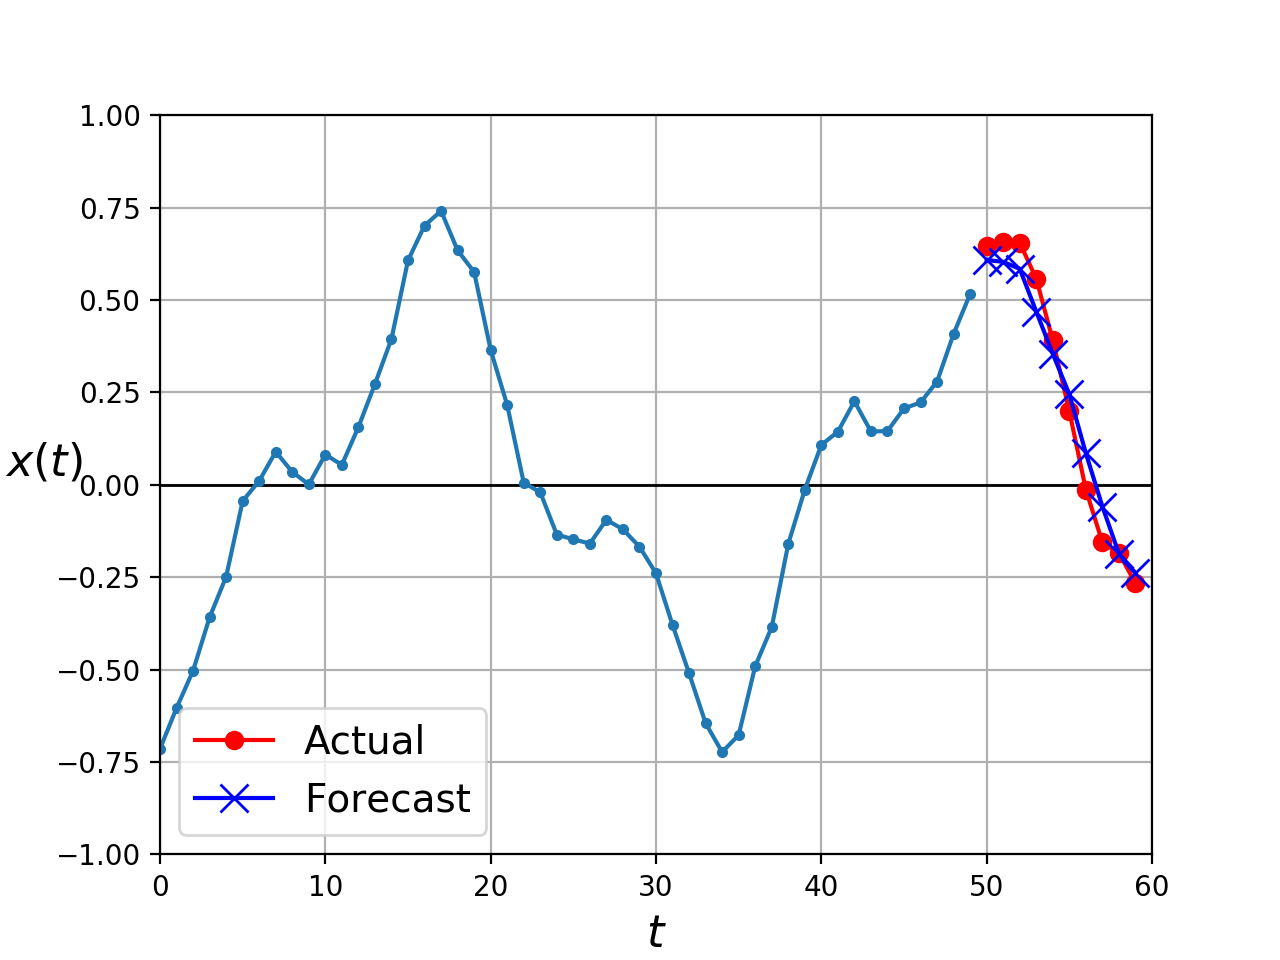

In [104]:
plt.figure(8)
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()